In [17]:
import os
from os import listdir
from PIL import Image, ImageFilter
import shutil
import random
import cv2
import numpy as np
from skimage.util import random_noise

ModuleNotFoundError: No module named 'skimage'

In [10]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 MB 7.9 MB/s eta 0:00:000m eta 0:00:010:0101m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 8.5 MB/s eta 0:00:00m eta 0:00:010:00:01m


In [11]:
def add_gaussian_noise(image):
    cv_image = np.array(image) 
    
    
    image = cv2.cvtColor(cv_image, cv2.COLOR_RGB2BGR)
    noisy_image = random_noise(image, mode='gaussian', seed=None, clip=True)
    noisy_image = np.array(255*noisy_image, dtype = 'uint8')
    noisy_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)
    return Image.fromarray(noisy_image)

In [12]:
def double_data(src,dst):
    files = os.listdir(src)
    for file in files:
        val = random.choice([90, 270])
        img = Image.open(src+"/"+file)
        if random.random() < .3:
            img = add_gaussian_noise(img)
        img.save(dst+"/"+file)
        img = img.rotate(val,expand = True)
        img.save(dst+"/"+file.split(".")[0]+"_rot.jpg")

In [13]:
def upsample_200(src,dst):
    files = os.listdir(src)
    for i,file in enumerate(files):
        if i<200:
            val = random.choice([90, 270])
            img = Image.open(src+"/"+file)
            if random.random() < .3:
#                 img = img.filter(ImageFilter.GaussianBlur(radius = 3))
                img = add_gaussian_noise(img)

            img.save(dst+"/"+file)
            img = img.rotate(val,expand = True)
            img.save(dst+"/"+file.split(".")[0]+"_rot.jpg")
        else:
            shutil.copy(src+"/"+file,dst+"/"+file)

In [14]:
def limit_to_1200(src,dst):
    files = os.listdir(src)
    for i,file in enumerate(files):
        img = Image.open(src+"/"+file)
        if random.random() < .3:
                img = add_gaussian_noise(img)
        img.save(dst+"/"+file.split(".")[0]+".jpg")
        if i>1200:
            break


In [15]:
def times_ten_data(src,dst):
    files = os.listdir(src)
    for file in files:
        img = Image.open(f"{src}/{file}")
        img = img.convert('RGB')
        img.save(dst+"/"+file)
        img1 = img.rotate(90,expand = True)
        img1.save(dst+"/"+file.split(".")[0]+"_90.jpg")
        img2 = img.rotate(270,expand = True)
        img2.save(dst+"/"+str(file.split(".")[0])+"_270.jpg")
        
        img3= img.transpose(Image.FLIP_LEFT_RIGHT)
        img3.save(dst+"/"+str(file.split(".")[0])+"_mir.jpg")
        img4 = img.transpose(Image.FLIP_TOP_BOTTOM)
        img4.save(dst+"/"+str(file.split(".")[0])+"_flp.jpg")
        
        img = Image.open(f"{src}/{file}")
        img = img.convert('RGB')
        img = add_gaussian_noise(img)
        img.save(dst+"/"+file)
        img1 = img.rotate(90,expand = True)
        img1.save(dst+"/"+file.split(".")[0]+"_90_noise.jpg")
        img2 = img.rotate(270,expand = True)
        img2.save(dst+"/"+str(file.split(".")[0])+"_270_noise.jpg")
        
        img3= img.transpose(Image.FLIP_LEFT_RIGHT)
        img3.save(dst+"/"+str(file.split(".")[0])+"_mir_noise.jpg")
        img4 = img.transpose(Image.FLIP_TOP_BOTTOM)
        img4.save(dst+"/"+str(file.split(".")[0])+"_flp_noise.jpg")

In [16]:
in_path = "./Data/" 
out_path =  "./Data/output/"
times_ten_data(in_path+"monkeypox",out_path+"monkeypox")
times_ten_data(in_path+"warts",out_path+"warts")
times_ten_data(in_path+"enczema",out_path+"enczema")
times_ten_data(in_path+"chickenpox",out_path+"chickenpox")
times_ten_data(in_path+"corns",out_path+"corns")

NameError: name 'np' is not defined

In [ ]:
import shutil
shutil.make_archive("aurgumented_data.zip",'zip',"./Data/output/")

'/Users/joaquin/Desktop/thesis-repo/aurgumented_data.zip.zip'

In [ ]:
import shutil
shutil.make_archive("aurgumented_data",'zip',"./Data/output/")

'/Users/joaquin/Desktop/thesis-repo/aurgumented_data.zip'

In [ ]:
from IPython.display import FileLink
FileLink(r'aurgumented_data.zip')

/Users/joaquin/Desktop/thesis-repo/aurgumented_data.zip

In [ ]:

import numpy as np
import pandas as pd
import os
from fastai.vision.all import *

ModuleNotFoundError: No module named 'fastai'

In [ ]:
DATASET_PATH = './aurgumented_data/'

In [ ]:
folders  = os.listdir(DATASET_PATH)
folders.sort()
print(folders)
df_list = []
labels_list = []
for i,classes in enumerate(folders):
  labels_list.append([classes,i])
  files = os.listdir(DATASET_PATH+classes)
  for items in files:
    df_list.append([classes+"/"+items,i])

df = pd.DataFrame(df_list,index = None, columns = ['image_id','label'])
df.to_csv('dataset.csv',index = False)

df2 = pd.DataFrame(labels_list,index = None, columns = ['class_name','label'])
df2.to_csv('labels.csv',index = False)

print(df.head())

print(df2.head())

['chickenpox', 'corns', 'enczema', 'monkeypox', 'warts']
                               image_id  label
0       chickenpox/chickenpox98_270.jpg      0
1       chickenpox/chickenpox88_270.jpg      0
2        chickenpox/chickenpox97_90.jpg      0
3  chickenpox/chickenpox5_flp_noise.jpg      0
4            chickenpox/chickenpox8.png      0
   class_name  label
0  chickenpox      0
1       corns      1
2     enczema      2
3   monkeypox      3
4       warts      4


In [ ]:
mapping = df2.to_dict()['class_name']
df['label_name'] = [mapping[label] for label in df['label']]
df.head()

,image_id,label,label_name
0,chickenpox/chickenpox98_270.jpg,0,chickenpox
1,chickenpox/chickenpox88_270.jpg,0,chickenpox
2,chickenpox/chickenpox97_90.jpg,0,chickenpox
3,chickenpox/chickenpox5_flp_noise.jpg,0,chickenpox
4,chickenpox/chickenpox8.png,0,chickenpox


In [ ]:
df.to_csv('dataset_complete_with_labels.csv',index=False)

In [ ]:
train = pd.read_csv("./dataset_complete_with_labels.csv")
print(train.shape)
train.head()

(6345, 3)


,image_id,label,label_name
0,chickenpox/chickenpox98_270.jpg,0,chickenpox
1,chickenpox/chickenpox88_270.jpg,0,chickenpox
2,chickenpox/chickenpox97_90.jpg,0,chickenpox
3,chickenpox/chickenpox5_flp_noise.jpg,0,chickenpox
4,chickenpox/chickenpox8.png,0,chickenpox


In [ ]:
train['image_id'] = DATASET_PATH + train['image_id'] 
train.head()

,image_id,label,label_name
0,./aurgumented_data/chickenpox/chickenpox98_270...,0,chickenpox
1,./aurgumented_data/chickenpox/chickenpox88_270...,0,chickenpox
2,./aurgumented_data/chickenpox/chickenpox97_90.jpg,0,chickenpox
3,./aurgumented_data/chickenpox/chickenpox5_flp_...,0,chickenpox
4,./aurgumented_data/chickenpox/chickenpox8.png,0,chickenpox


<Axes: >

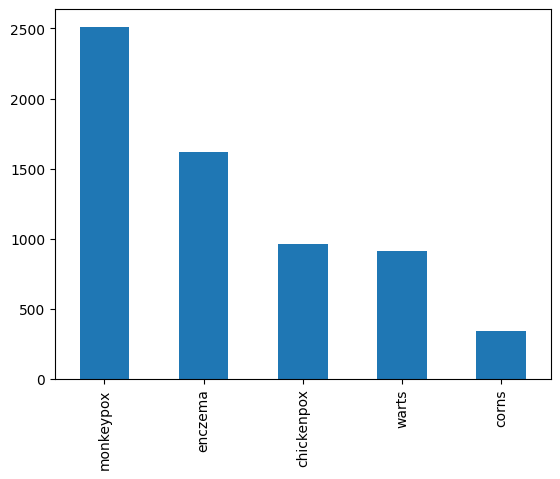

In [ ]:
train['label_name'].value_counts().plot.bar()

In [ ]:
def get_x(row): return row['image_id']
def get_y(row): return row['label']

db = DataBlock(blocks = (ImageBlock, CategoryBlock),
              get_x = get_x,
               get_y = get_y,
               splitter = RandomSplitter(valid_pct = 0.2),
               item_tfms = [Resize(224)],
               batch_tfms = [RandomResizedCropGPU(224), *aug_transforms(), 
                            Normalize.from_stats(*imagenet_stats)]            
              )

NameError: name 'DataBlock' is not defined

In [ ]:

dls = db.dataloaders(train, bs = 64)

NameError: name 'db' is not defined

In [ ]:
!pip install fastai== 2.0

zsh:1: = not found
